<a href="https://colab.research.google.com/github/maimunul/LZW-and-Huffman-Image-compression/blob/main/ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [30]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Huffman **Coding**

Huffman Compression Program


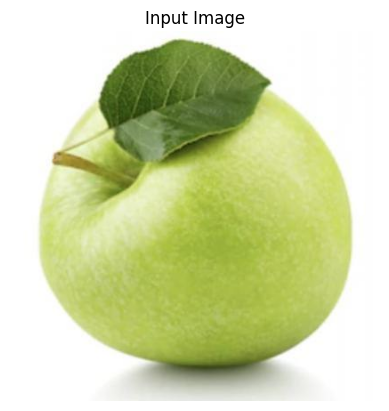

Huffman tree with merged pathways:
Level 0 : [[2868851, ',7809[]254631 ']]
Level 1 : [[1160002, ',7809[]', '1'], [1708849, '254631 ', '0']]
Level 2 : [[738634, '25', '1'], [970215, '4631 ', '0']]
Level 3 : [[519167, ',', '1'], [640835, '7809[]', '0'], [970215, '4631 ', '0']]
Level 4 : [[451048, '4631', '1'], [519167, ' ', '0'], [640835, '7809[]', '0']]
Level 5 : [[362277, '2', '1'], [376357, '5', '0'], [519167, ' ', '0'], [640835, '7809[]', '0']]
Level 6 : [[293889, '7809', '1'], [346946, '[]', '0'], [376357, '5', '0'], [519167, ' ', '0']]
Level 7 : [[218041, '463', '1'], [233007, '1', '0'], [346946, '[]', '0'], [376357, '5', '0'], [519167, ',', '1']]
Level 8 : [[173473, '[', '1'], [173473, ']', '0'], [233007, '1', '0'], [362277, '2', '1'], [519167, ' ', '0']]
Level 9 : [[141416, '78', '1'], [152473, '09', '0'], [173473, ']', '0'], [233007, '1', '0'], [376357, '5', '0'], [519167, ',', '1']]
Level 10 : [[92111, '4', '1'], [125930, '63', '0'], [152473, '09', '0'], [173473, ']', '0'], [36

In [31]:
import re
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

print("Huffman Compression Program")
print("=================================================================")

file = '/content/drive/MyDrive/ColabNotebooks/FruitsAndVegRealTimeDet/test_set/fresh-apple--11-_jpg.rf.320b268e4097801f42ebde23a174df5c.jpg'
my_string = np.asarray(Image.open(file), np.uint8)
shape = my_string.shape
a = my_string
#print("Entered string is:", my_string)

# Visualize the input image
plt.imshow(my_string)
plt.title("Input Image")
plt.axis('off')
plt.show()

my_string = str(my_string.tolist())

letters = []
only_letters = []
for letter in my_string:
    if letter not in letters:
        frequency = my_string.count(letter)
        letters.append(frequency)
        letters.append(letter)
        only_letters.append(letter)

nodes = []
while len(letters) > 0:
    nodes.append(letters[0:2])
    letters = letters[2:]
nodes.sort()
huffman_tree = []
huffman_tree.append(nodes)


def combine_nodes(nodes):
    pos = 0
    newnode = []
    if len(nodes) > 1:
        nodes.sort()
        nodes[pos].append("1")
        nodes[pos + 1].append("0")
        combined_node1 = (nodes[pos][0] + nodes[pos + 1][0])
        combined_node2 = (nodes[pos][1] + nodes[pos + 1][1])
        newnode.append(combined_node1)
        newnode.append(combined_node2)
        newnodes = []
        newnodes.append(newnode)
        newnodes = newnodes + nodes[2:]
        nodes = newnodes
        huffman_tree.append(nodes)
        combine_nodes(nodes)
    return huffman_tree


newnodes = combine_nodes(nodes)

huffman_tree.sort(reverse=True)
print("Huffman tree with merged pathways:")

checklist = []
for level in huffman_tree:
    for node in level:
        if node not in checklist:
            checklist.append(node)
        else:
            level.remove(node)
count = 0
for level in huffman_tree:
    print("Level", count, ":", level)
    count += 1
print()

letter_binary = []
if len(only_letters) == 1:
    lettercode = [only_letters[0], "0"]
    letter_binary.append(letter_code * len(my_string))
else:
    for letter in only_letters:
        code = ""
        for node in checklist:
            if len(node) > 2 and letter in node[1]:
                code = code + node[2]
        lettercode = [letter, code]
        letter_binary.append(lettercode)
print(letter_binary)
print("Binary code generated:")
for letter in letter_binary:
    print(letter[0], letter[1])

bitstring = ""
for character in my_string:
    for item in letter_binary:
        if character in item:
            bitstring = bitstring + item[1]
binary = "0b" + bitstring
print("Your message as binary is:")

uncompressed_file_size = len(my_string) * 7
compressed_file_size = len(binary) - 2
print("Your original file size was", uncompressed_file_size, "bits. The compressed size is:", compressed_file_size)
print("This is a saving of ", uncompressed_file_size - compressed_file_size, "bits")


# LZW **Coding**

Compression ratio: 27.134


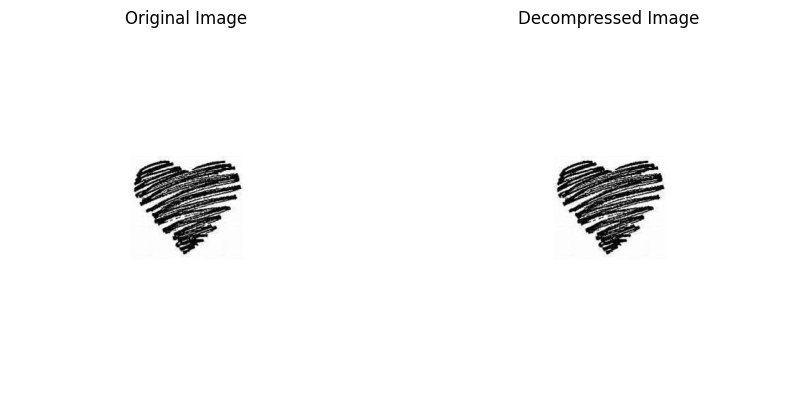

In [32]:
import numpy as np
from PIL import Image
import io
import matplotlib.pyplot as plt

def compress(image_path):

    img = Image.open(image_path).convert('L')
    img_array = np.array(img)
    img_flat = img_array.flatten()

    # Initialize dictionary
    dictionary_size = 256
    dictionary = {chr(i): i for i in range(dictionary_size)}

    compressed_data = []
    current_code = ""
    for symbol in img_flat:
        new_code = current_code + chr(symbol)
        if new_code in dictionary:
            current_code = new_code
        else:
            compressed_data.append(dictionary[current_code])
            dictionary[new_code] = dictionary_size
            dictionary_size += 1
            current_code = chr(symbol)

    if current_code:
        compressed_data.append(dictionary[current_code])

    return compressed_data, dictionary, img_array

def decompress(compressed_data, dictionary, img_shape):
    dictionary_size = 256
    inverse_dictionary = {v: k for k, v in dictionary.items()}
    current_code = chr(compressed_data.pop(0))
    decompressed_data = current_code
    for code in compressed_data:
        if code in inverse_dictionary:
            entry = inverse_dictionary[code]
        elif code == dictionary_size:
            entry = current_code + current_code[0]
        else:
            raise ValueError('Bad compressed code')

        decompressed_data += entry

        # Add new entry to dictionary
        dictionary[dictionary_size] = current_code + entry[0]
        dictionary_size += 1

        current_code = entry


    decompressed_img = np.array([ord(c) for c in decompressed_data], dtype=np.uint8).reshape(img_shape)

    return decompressed_img

image_path = "/content/exp.jpg"
compressed_data, dictionary, img_array = compress(image_path)
decompressed_img = decompress(compressed_data, dictionary, img_array.shape)
print("Compression ratio:", len(compressed_data) / len(decompressed_img))

# Visualize original image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_array, cmap='gray')
plt.title("Original Image")
plt.axis('off')

# Visualize decompressed image
plt.subplot(1, 2, 2)
plt.imshow(decompressed_img, cmap='gray')
plt.title("Decompressed Image")
plt.axis('off')

plt.show()
